Перші рядки таблиці:
             Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0              Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2         Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4          Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
Таблиця після видалення останнього рядка:
               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129 

<ipython-input-27-f4cce258dbcb>:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  first_dataframe.fillna(first_dataframe.mean(), inplace=True)


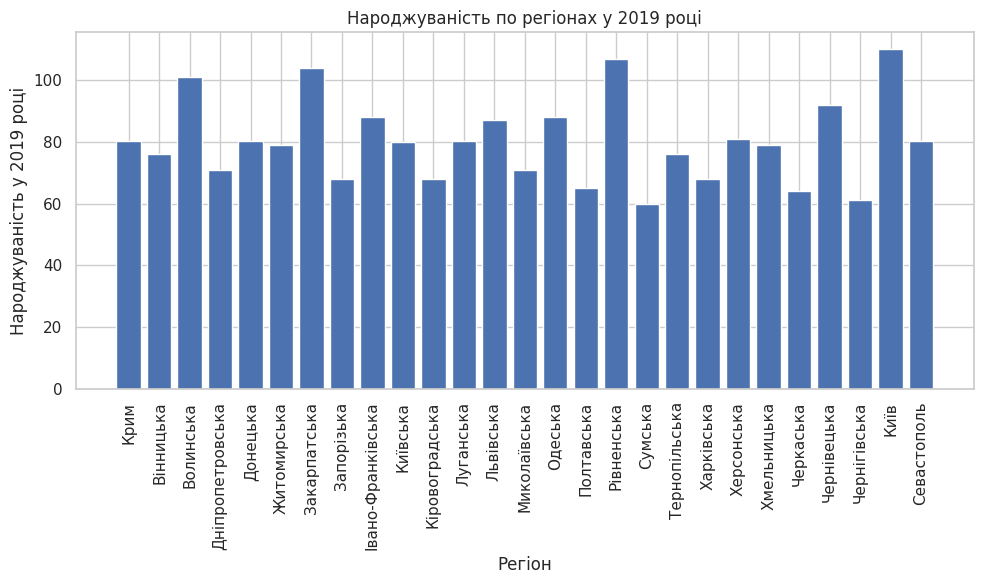

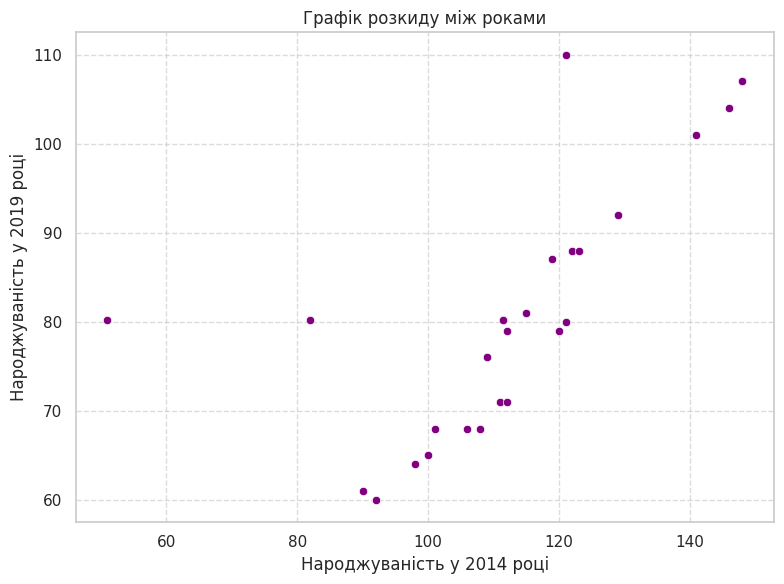

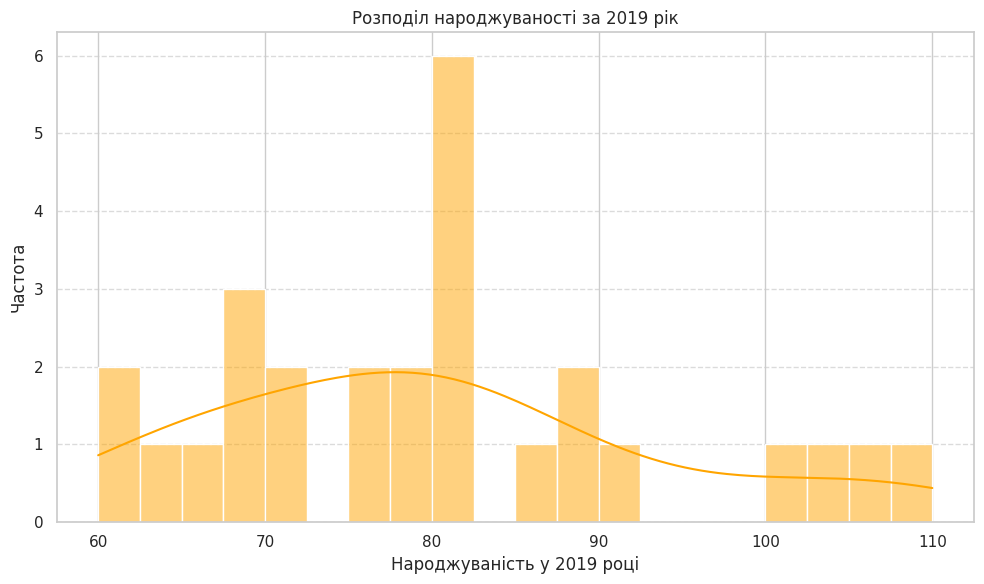

In [27]:
%matplotlib inline
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження вмісту сторінки
url = 'https://uk.wikipedia.org/wiki/Населення_України'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Знаходження таблиць на сторінці
tables = soup.find_all('table', {'class': 'wikitable'})

# Виведення першої знайденої таблиці
first_table = tables[6]
dataframe_list = pd.read_html(str(first_table), header=0)
if dataframe_list:
    first_dataframe = dataframe_list[0]

    # Заміна "—" на pd.NA
    first_dataframe.replace("—", pd.NA, inplace=True)

    # Заміна типів колонок (крім "Регіон")
    for column in first_dataframe.columns:
        if column != 'Регіон' and first_dataframe[column].dtype == object:
            first_dataframe[column] = pd.to_numeric(first_dataframe[column], errors='coerce')





    print("Перші рядки таблиці:")
    print(first_dataframe.head())

    # Видалення останнього рядка
    first_dataframe.drop(first_dataframe.index[-1], inplace=True)
    print("Таблиця після видалення останнього рядка:")
    print(first_dataframe)

    # # Заміна відсутніх значень середніми значеннями
    first_dataframe.fillna(first_dataframe.mean(), inplace=True)
    print("Таблиця після заміни відсутніх значень:")
    print(first_dataframe)

    # # Обчислення часток пропусків у кожній колонці
    missing_ratios = first_dataframe.isnull().sum() / len(first_dataframe) * 100
    print("Частки пропусків в кожній колонці:")
    print(missing_ratios)


    # Визначення кількості рядків та стовпців у датафреймі
    num_rows, num_columns = pd.read_html(str(first_table), header=0)[0].shape
    print("Кількість рядків:", num_rows)
    print("Кількість стовпців:", num_columns)

    # Визначення типів стовпців
    column_types = first_dataframe.dtypes
    print("Типи стовпців:")
    print(column_types)

    average_birth_rate_2019 = first_dataframe['2019'].mean()
    regions_above_average = first_dataframe[first_dataframe['2019'] > average_birth_rate_2019]

    list_of_regions_above_average = regions_above_average['Регіон'].tolist()

    print("Список регіонів з народжуваністю вищою за середню у 2019 році:", list_of_regions_above_average)



    max_birth_rate_row = first_dataframe[first_dataframe['2014'] == first_dataframe['2014'].max()]
    region_with_highest_birth_rate = max_birth_rate_row['Регіон'].values[0]

    print("Регіон з найвищою народжуваністю у 2014 році:", region_with_highest_birth_rate)


    # Вибираємо дані для побудови діаграми
    regions = first_dataframe['Регіон']
    birth_rates_2019 = first_dataframe['2019']

    # Побудова стовпчикової діаграми
    plt.figure(figsize=(10, 6))
    plt.bar(regions, birth_rates_2019)
    plt.xlabel('Регіон')
    plt.ylabel('Народжуваність у 2019 році')
    plt.title('Народжуваність по регіонах у 2019 році')
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Показати діаграму
    plt.show()
else:
    print("Таблиця не знайдена")

# Побудова графіка 1: Графік розкиду між двома роками
plt.figure(figsize=(8, 6))
sns.scatterplot(data=first_dataframe, x='2014', y='2019', color='purple')
plt.xlabel('Народжуваність у 2014 році')
plt.ylabel('Народжуваність у 2019 році')
plt.title('Графік розкиду між роками')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Побудова графіка 3: Графік розподілу народжуваності за 2019 рік
plt.figure(figsize=(10, 6))
sns.histplot(data=first_dataframe, x='2019', bins=20, color='orange', kde=True)
plt.xlabel('Народжуваність у 2019 році')
plt.ylabel('Частота')
plt.title('Розподіл народжуваності за 2019 рік')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()